# R을 사용해 간트(Gantt) 차트 그리기

> 간트 차트(Gantt chart)는 프로젝트 일정관리를 위한 바(bar)형태의 도구로서, 각 업무별로 일정의 시작과 끝을 그래픽으로 표시하여 전체 일정을 한눈에 볼 수 있다. -wiki

회사 생활을 하다보니 종종 간트 차트를 그리는 일이 있습니다. 많은 사람들이 엑셀을 가지고 그리는 경우가 많은데 조금 더 미려한 플랏을 그리는 방법이 없을까 찾아보니 파이썬보다는 R로 그리는 편이 수월한 것 같더군요. 아래에는 **ganttrify** 와 **plan** 이라는 도구를 사용하는 방법에 대한 예제 코드 입니다.

## 0. 사용한 R 환경 정보

In [1]:
R.Version()

$platform
[1] "x86_64-conda-linux-gnu"

$arch
[1] "x86_64"

$os
[1] "linux-gnu"

$system
[1] "x86_64, linux-gnu"

$status
[1] ""

$major
[1] "4"

$minor
[1] "1.1"

$year
[1] "2021"

$month
[1] "08"

$day
[1] "10"

$`svn rev`
[1] "80725"

$language
[1] "R"

$version.string
[1] "R version 4.1.1 (2021-08-10)"

$nickname
[1] "Kick Things"

## 1. 필요한 도구 설치하기

R에서는 `install.packages('ganttrify')` 명령어로 간단하게 도구들을 설치할 수 있습니다. 설치가 완료되면 `library("ganttrify")` 명령어를 실행해 불러와야 합니다.


In [30]:
#install.packages('ganttrify')
library("ganttrify")

library(repr) # jupyter notebook에서 플랏의 크기를 조절하기 위한 도구

## 2. 간트 차트 그리기

먼저 플랏의 크기를 설정해야 합니다. 간트차트는 일반적으로 옆으로 넓은 형태임으로 `repr`도구를 사용해 크기를 설정하였습니다.
`ganttrify`에 이미 포함되어 있는 `test_project`데이터를 사용해 그려볼 것입니다. 다음의 간단한 코드로 미려한 플랏이 그려집니다.

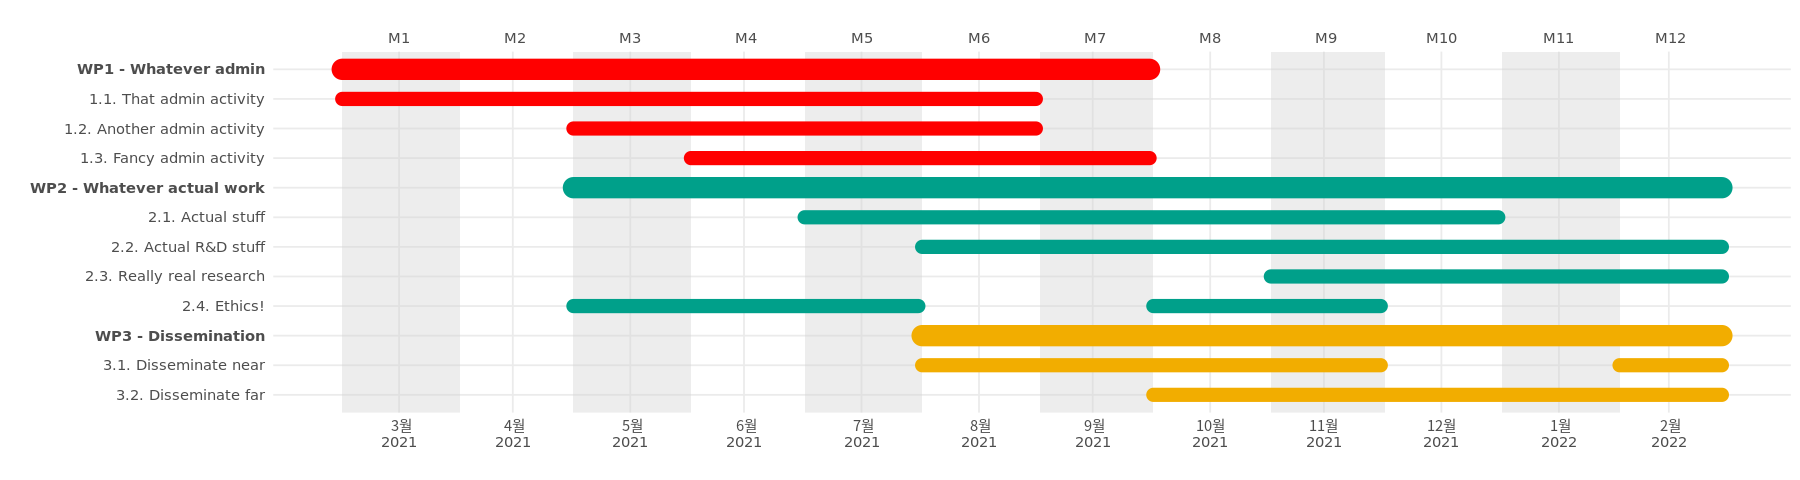

In [54]:
options(repr.plot.width=15, repr.plot.height=4) 
# jupyter notebook에서 플랏 크기 조절

ganttrify(project = ganttrify::test_project,
          project_start_date = "2021-03",
          font_family = "Roboto Condensed")

### 2.1. 특정 시점 표기하기

`spot`옵션을 사용하면 간트 차트에 시점을 표기할 수도 있습니다.


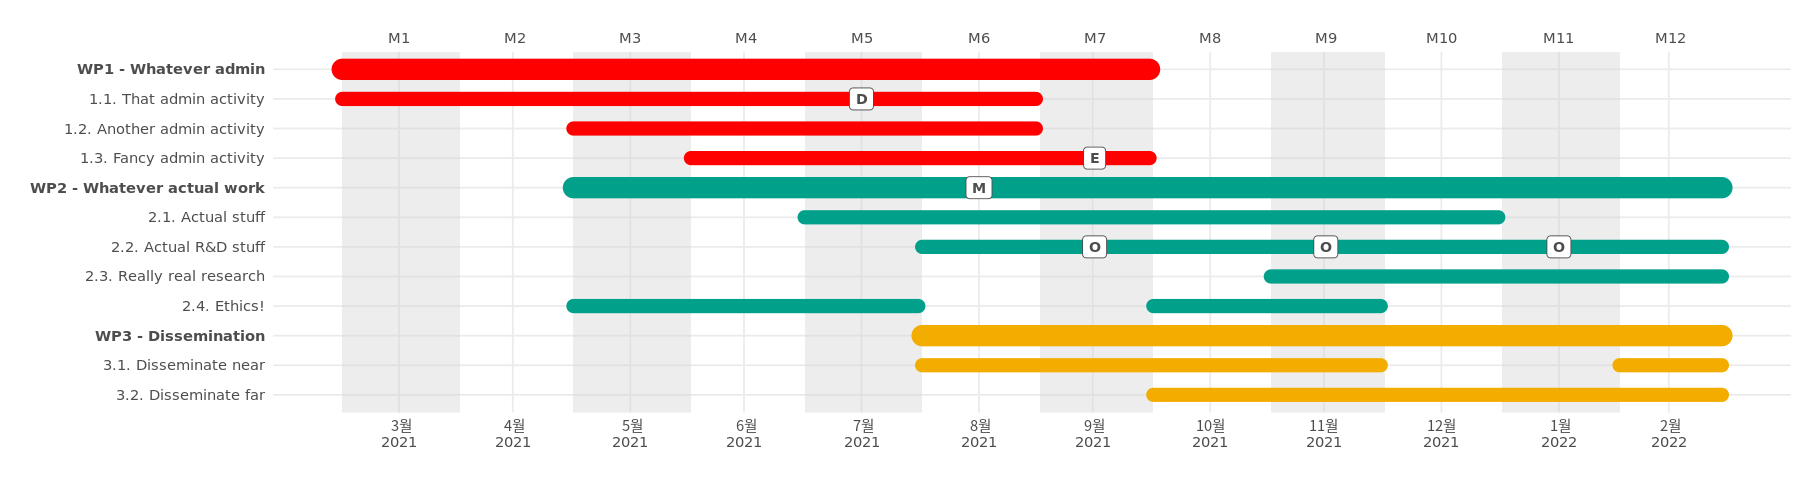

In [55]:
ganttrify(project = ganttrify::test_project,
          spots = ganttrify::test_spots,
          project_start_date = "2021-03",
          font_family = "Roboto Condensed")

### 2.2. 분기 표시하기

분기에 따른 선을 그어서 다음과 같이 그릴 수도 있습니다.

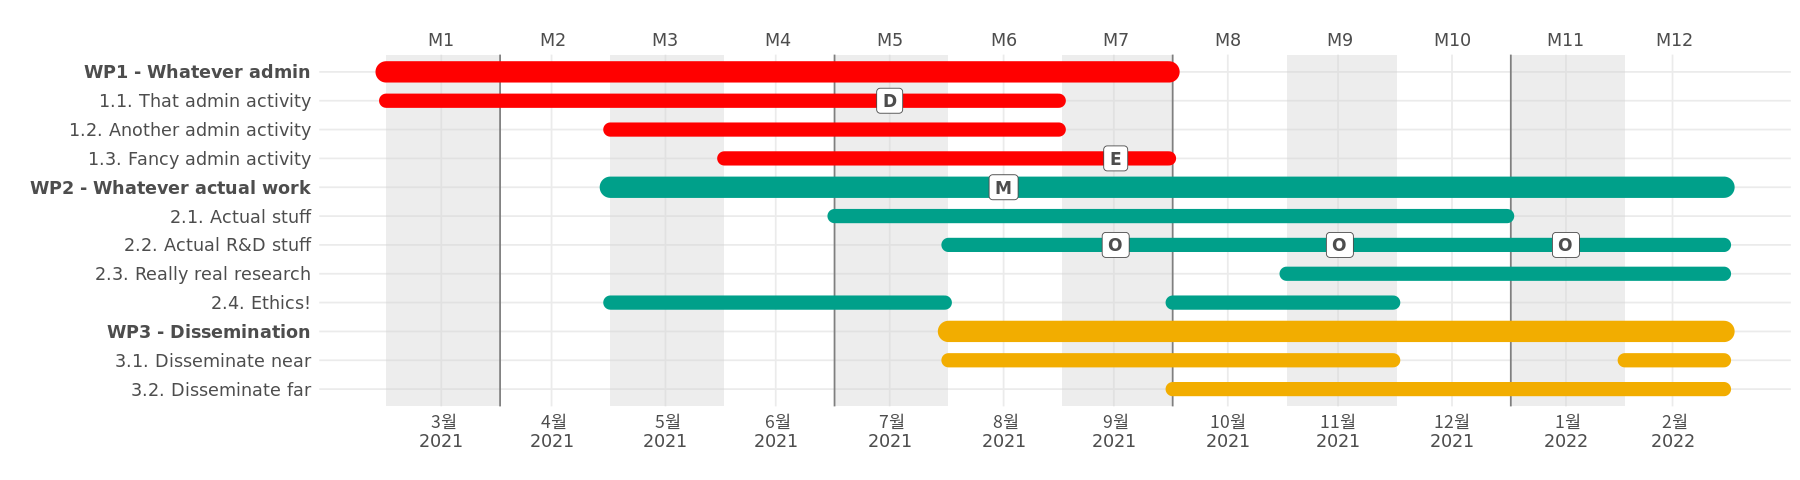

In [56]:
ganttrify(project = ganttrify::test_project,
          spots = ganttrify::test_spots,
          project_start_date = "2021-03",
          size_text_relative = 1.2, 
          mark_quarters = TRUE,
          font_family = "Roboto Condensed")


### 2.3. 대분류 감추기

각각의 업무를 포괄하는 대분류(`WP`)를 감춘 그림을 그릴 수도 있습니다. 다만 아쉬운 것은 대분류는 표기하지만 bar graph는 그리지 않는 기능은 아직 없는 것 같습니다.

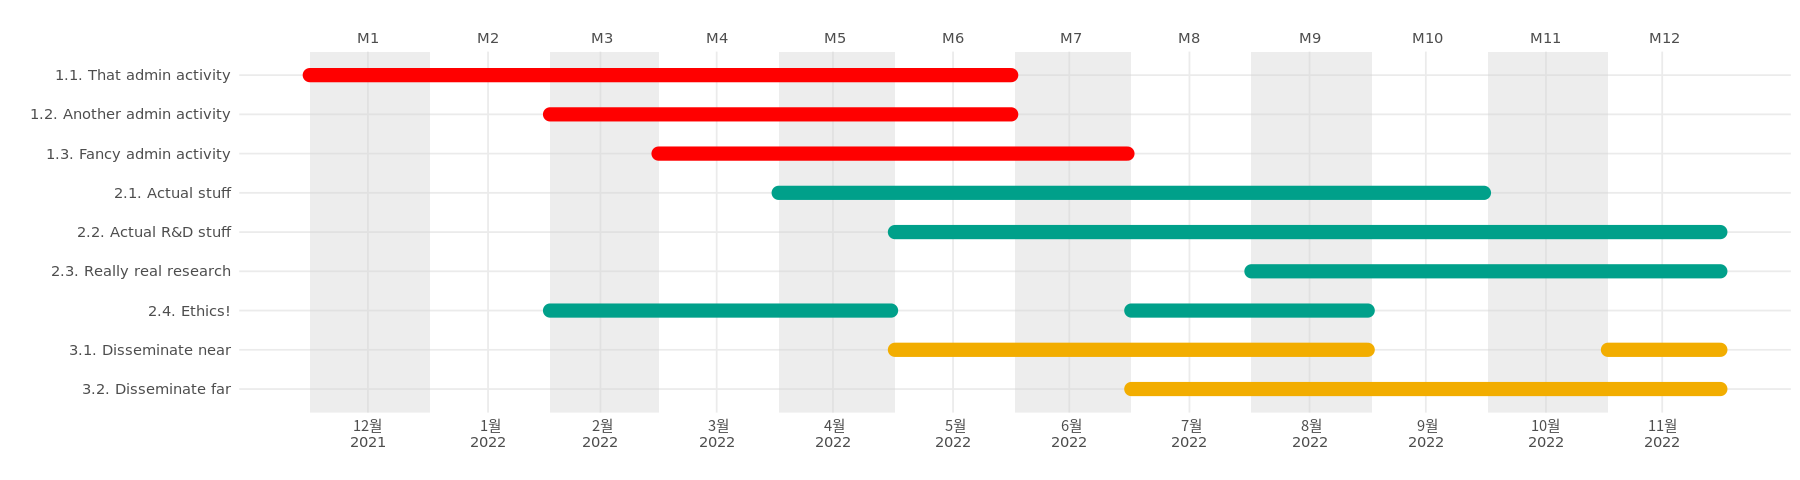

In [57]:
ganttrify(project = ganttrify::test_project,
          hide_wp = TRUE,
          font_family = "Roboto Condensed")


### 2.4. 그래프 모양을 변경하기

bar graph을 끝을 각지게 하는 방법과 반투명하게 만드는 방법은 다음과 같습니다.

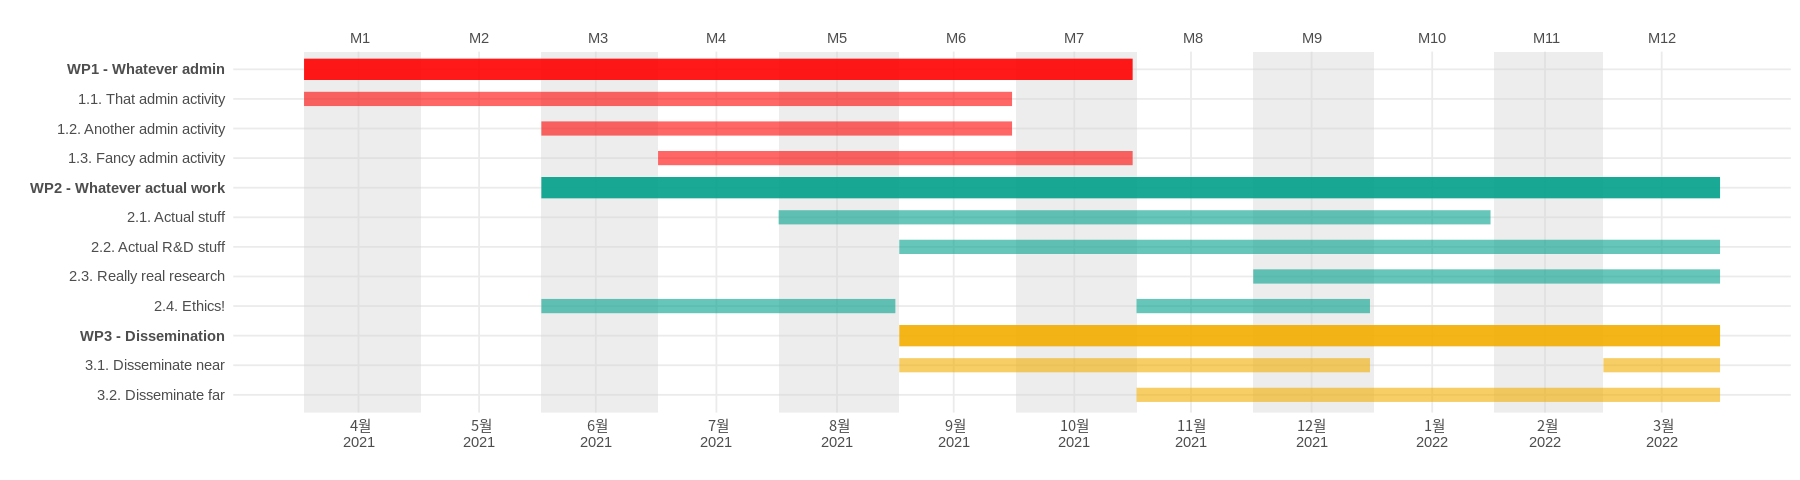

In [58]:
ganttrify(project = ganttrify::test_project,
          project_start_date = "2021-04",
          alpha_wp = 0.9,
          alpha_activity = 0.6,
          line_end = "butt")


### 2.5. 문자 왼쪽 정렬하기

기본적으로 업무들은 오른쪽 정렬로 그려집니다. 만약 왼쪽으로 정렬되기를 원하면 다음과 같이 작성하면 됩니다.

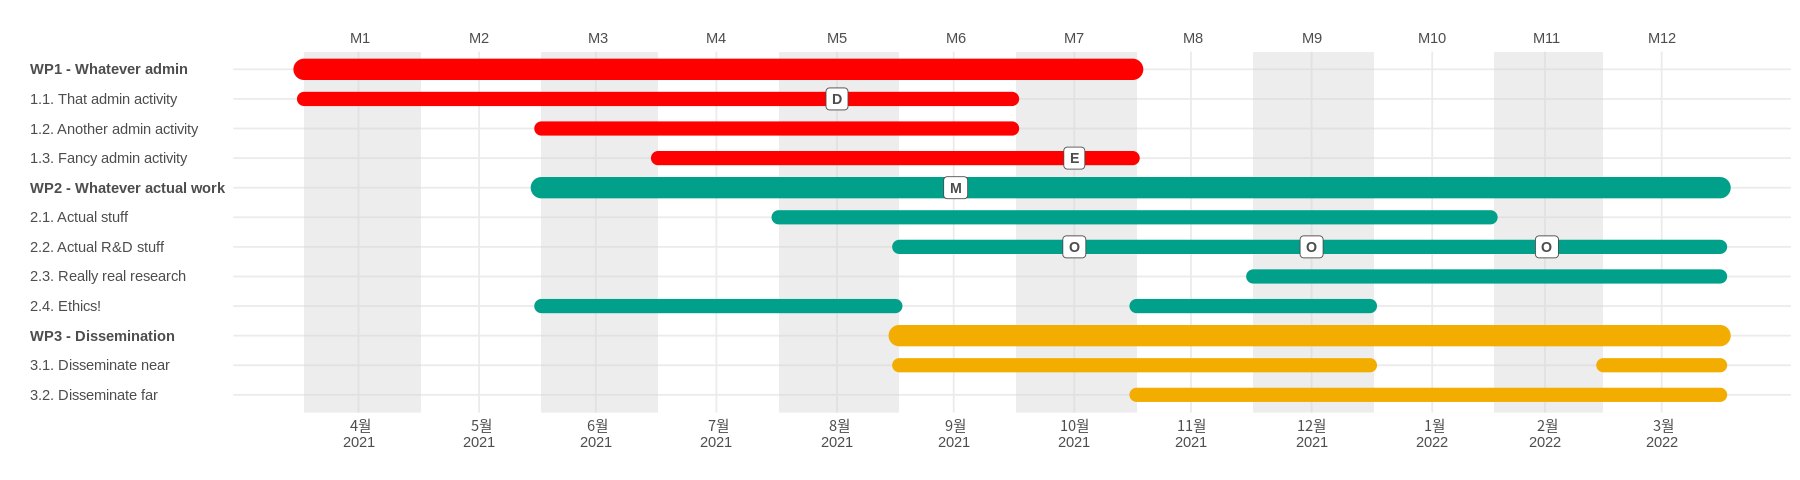

In [60]:
ganttrify(project = ganttrify::test_project,
          spots = ganttrify::test_spots,
          project_start_date = "2021-04",
          axis_text_align = "left") 

### 2.6. 플랏에 글씨 추가하기

다음과 같이 플랏의 제목과 출처등을 표기할 수도 있습니다.

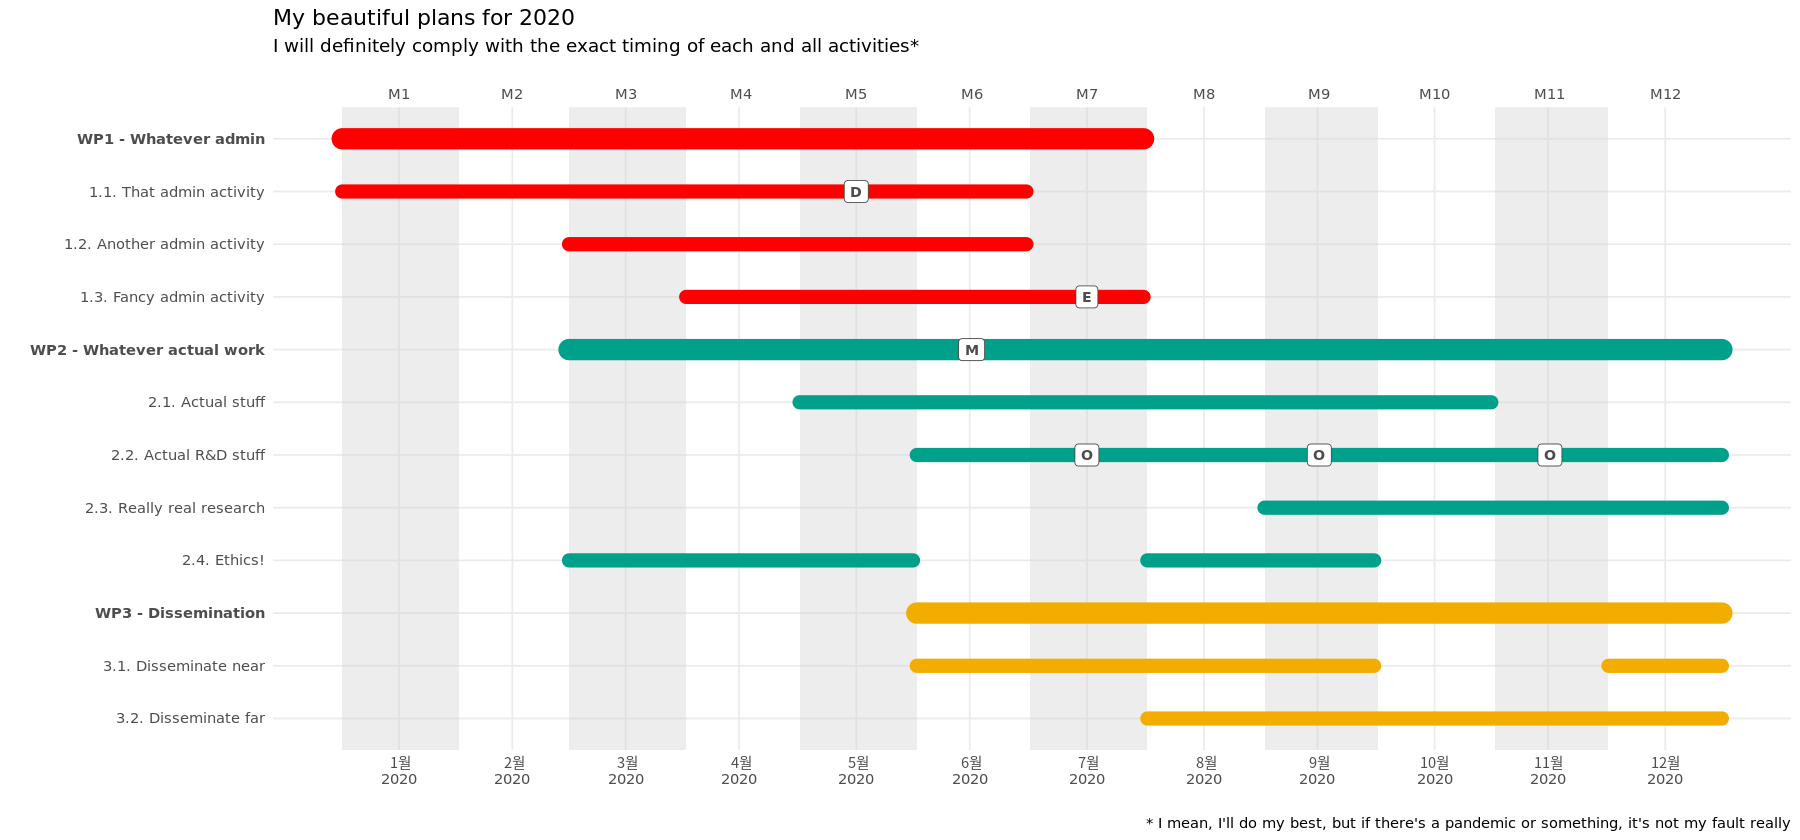

In [63]:
options(repr.plot.width=15, repr.plot.height=7) 
# jupyter notebook에서 fig size 조절

ganttrify(project = ganttrify::test_project,
          spots = ganttrify::test_spots,
          project_start_date = "2020-01",
          font_family = "Roboto Condensed")+ ggplot2::labs(title = "My beautiful plans for 2020",
                subtitle = "I will definitely comply with the exact timing of each and all activities*",
                caption = "* I mean, I'll do my best, but if there's a pandemic or something, it's not my fault really")


## 3. 다른 도구 사용하기

**plan** 이라는 도구를 사용해서 그려봅니다. 참고로 plan은 이미 오래전에 개발이 중단된 것 같습니다. 현재 시점에는 ganttrify를 사용하는것이 더 좋을 것 같습니다. 그래도 plan의 사용법이 아주 간단해 간략하게 알아보겠습니다. 

### 3.1. 공식 예제 코드

다음은 plan의 개발자가 제공하는 공식 예제 코드입니다.

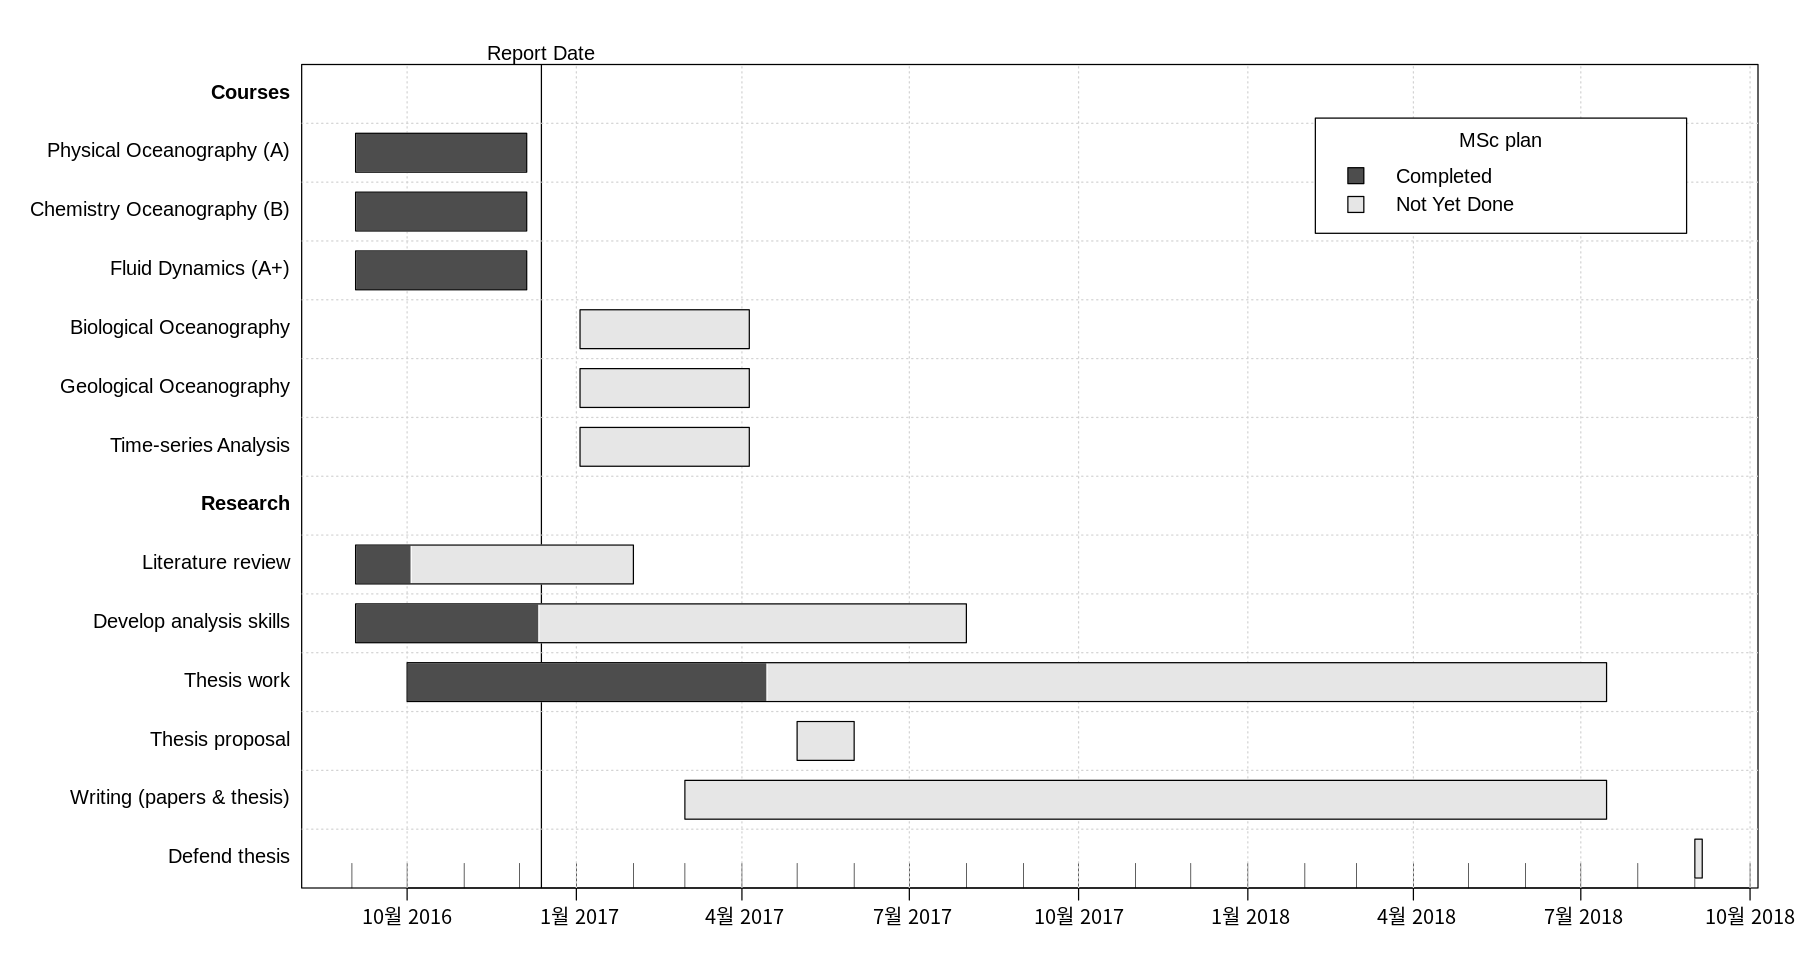

In [33]:
#install.packages('plan') # plan 도구 설치
library(plan) # plan 도구를 불러옵니다.

g <- new("gantt")
g <- ganttAddTask(g, "Courses") # no times, so a heading
g <- ganttAddTask(g, "Physical Oceanography (A)", "2016-09-03", "2016-12-05", done=100)
g <- ganttAddTask(g, "Chemistry Oceanography (B)", "2016-09-03", "2016-12-05", done=100)
g <- ganttAddTask(g, "Fluid Dynamics (A+)", "2016-09-03", "2016-12-05", done=100)
g <- ganttAddTask(g, "Biological Oceanography", "2017-01-03", "2017-04-05")
g <- ganttAddTask(g, "Geological Oceanography", "2017-01-03", "2017-04-05")
g <- ganttAddTask(g, "Time-series Analysis", "2017-01-03", "2017-04-05")
g <- ganttAddTask(g, "Research") # no times, so a heading
g <- ganttAddTask(g, "Literature review", "2016-09-03", "2017-02-01", done=20)
g <- ganttAddTask(g, "Develop analysis skills", "2016-09-03", "2017-08-01", done=30)
g <- ganttAddTask(g, "Thesis work", "2016-10-01", "2018-07-15", done=30)
g <- ganttAddTask(g, "Thesis proposal", "2017-05-01", "2017-06-01")
g <- ganttAddTask(g, "Writing (papers & thesis)", "2017-03-01", "2018-07-15")
g <- ganttAddTask(g, "Defend thesis", "2018-09-01", "2018-09-05")

options(repr.plot.width=15, repr.plot.height=8) 
# jupyter notebook에서 fig size 조절

plot(g, ylabel=list(font=ifelse(is.na(g[["start"]]), 2, 1)),
     event.time="2016-12-13", event.label="Report Date")
legend("topright", pch=22, pt.cex=2, pt.bg=gray(c(0.3, 0.9)),
       border="black", 
       legend=c("Completed", "Not Yet Done"), title="MSc plan", bg="white")

### 3.2. 실제로 적용하기

plan은 할일 목록을 다음과 같이 직접 입력할 수 있어서 편리하기도 하지만 동시에 불편하기도 합니다.

```R
g <- new("gantt")
g <- ganttAddTask(g, "Cell line dev.")
g <- ganttAddTask(g, "Top3 RCB","2020-01-15","2020-07-18",done=100)
g <- ganttAddTask(g, "Cell line stability","2020-07-01","2020-10-01",done=100)
g <- ganttAddTask(g, "MCB mfg and characterization","2020-07-15","2021-12-20",done=90)
g <- ganttAddTask(g, "Process development")
g <- ganttAddTask(g, "USP","2020-07-01","2021-03-01",done=100)
g <- ganttAddTask(g, "DSP","2020-08-12","2021-02-26",done=100)
g <- ganttAddTask(g, "Manufacturing")
g <- ganttAddTask(g, "Non-GMP DS","2021-02-26","2021-07-28",done=100)
g <- ganttAddTask(g, "Non-GMP DP","2021-07-26","2021-08-28",done=100)
g <- ganttAddTask(g, "GMP DS","2021-07-30","2021-10-28",done=100)
g <- ganttAddTask(g, "GMP DP","2021-10-26","2022-01-28",done=100)
g <- ganttAddTask(g, "Virus clearance study","2021-04-02","2021-12-28",done=90)
g <- ganttAddTask(g, "CTD documentation","2021-07-21","2022-01-31",done=40)
```

위의 할일 목록을 가지고 플랏을 그려봅니다.

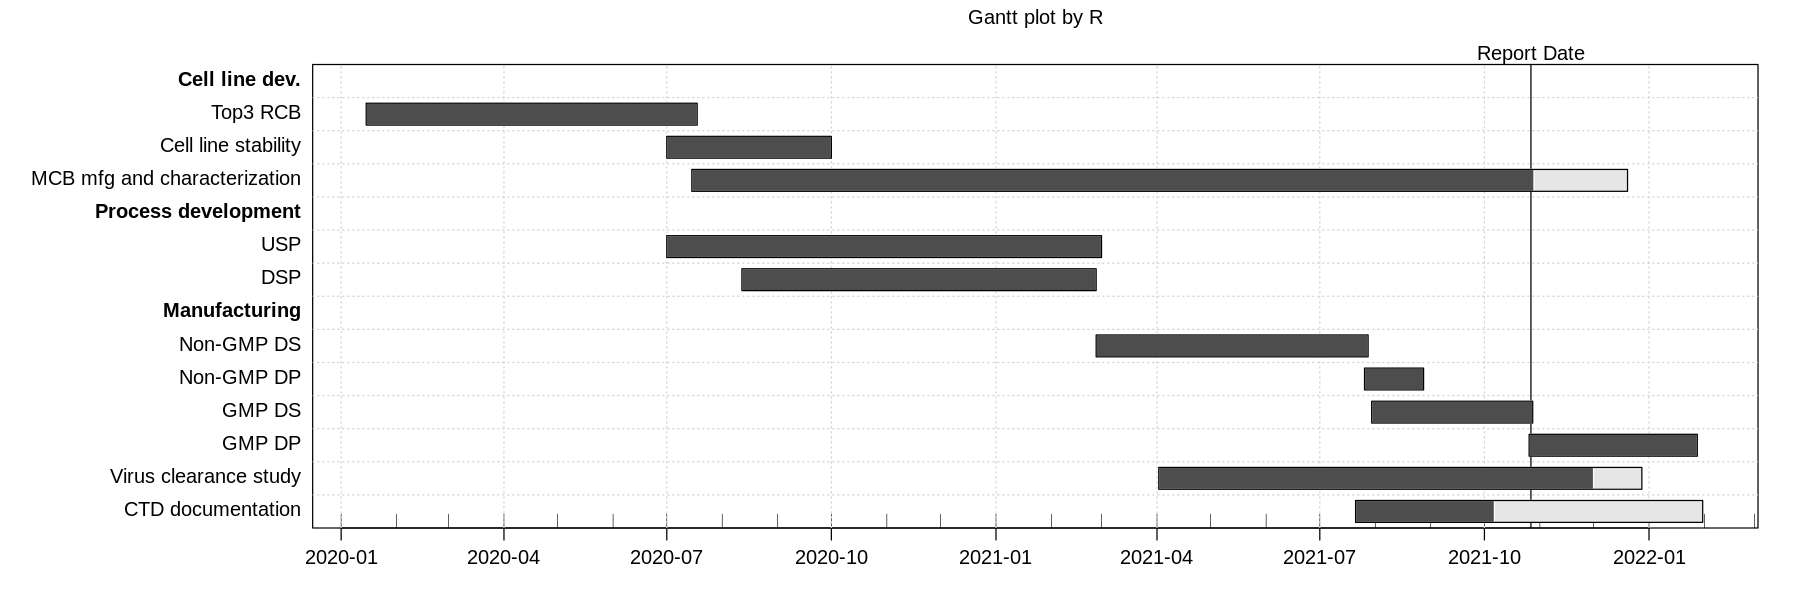

In [24]:
plot(g, time.format="%Y-%m", time.labels.by,
     ylabel=list(font=ifelse(is.na(g[["start"]]), 2, 1)),
     event.label='Report Date',event.time='2021-10-27',
     main="Gantt plot by R")

### 3.3. 이벤트 추가하기

만약 두가지 이상의 이벤트를 추가하고 싶다면 다음과 같이 작성합니다.

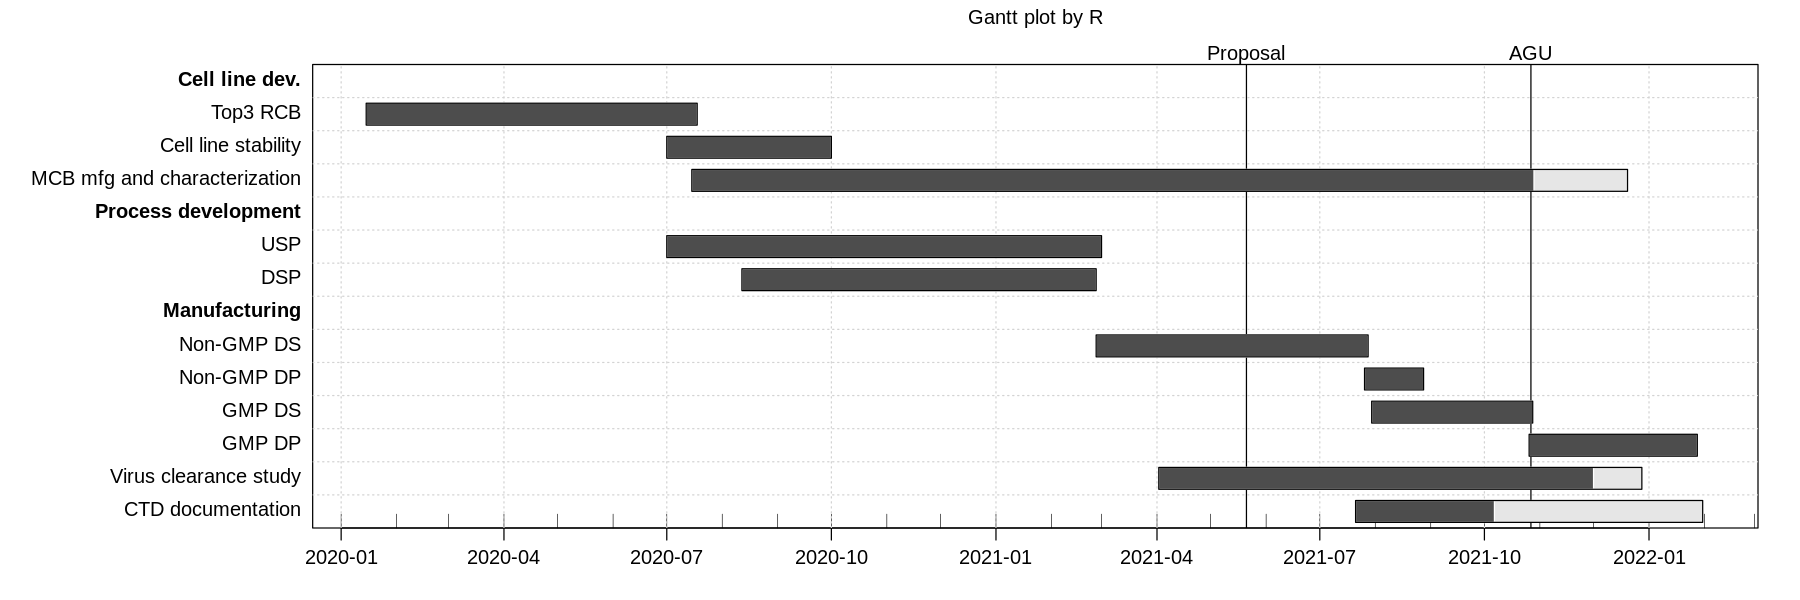

In [27]:
# Plot with two events
event.label <- c("Proposal", "AGU")
event.time <- c("2021-05-21", "2021-10-27")

plot(g, time.format="%Y-%m", time.labels.by,
     ylabel=list(font=ifelse(is.na(g[["start"]]), 2, 1)),
     event.label=event.label,event.time=event.time,
     main="Gantt plot by R") 

### 3.4. 세부 설정 변경하기

아래 코드와 같이 흑백이 아닌 색상으로도 변경이 가능하고 생각보다 다양한 것을 조절할 수 있습니다.

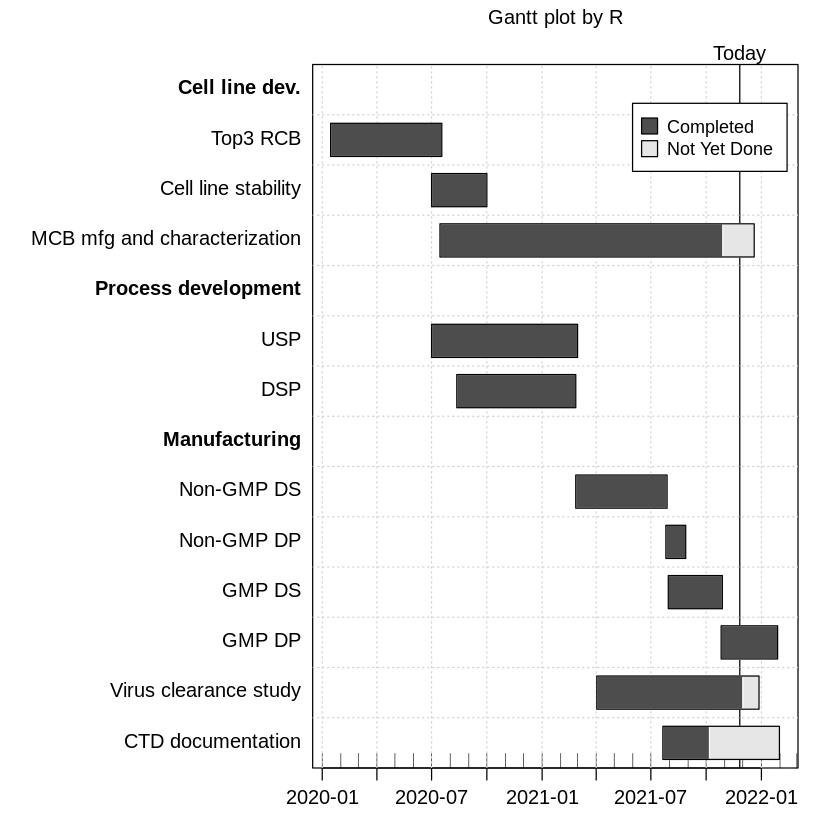

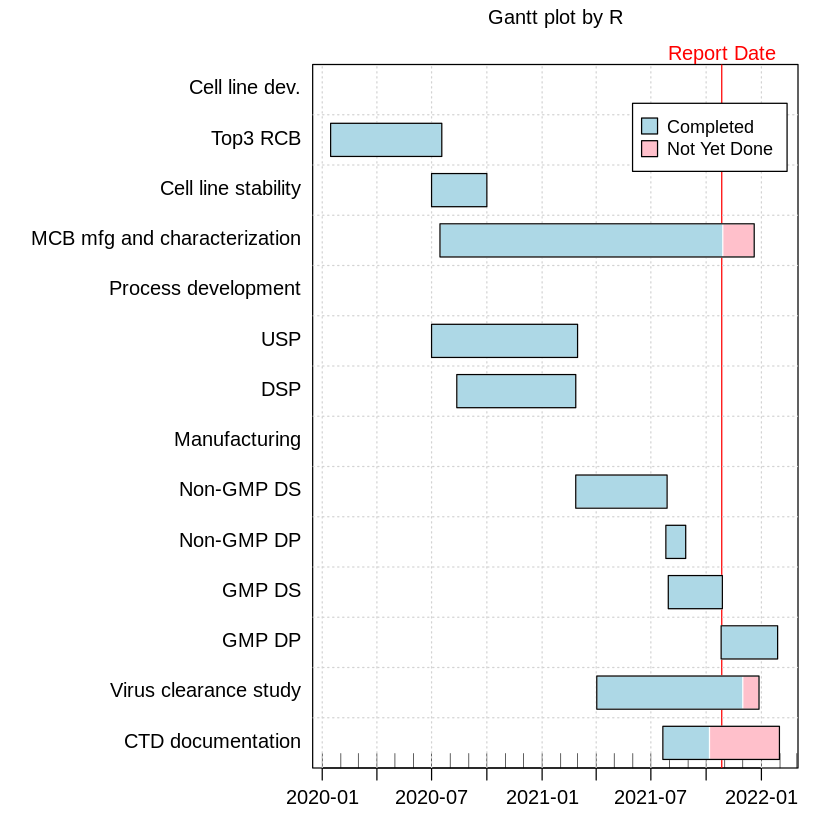

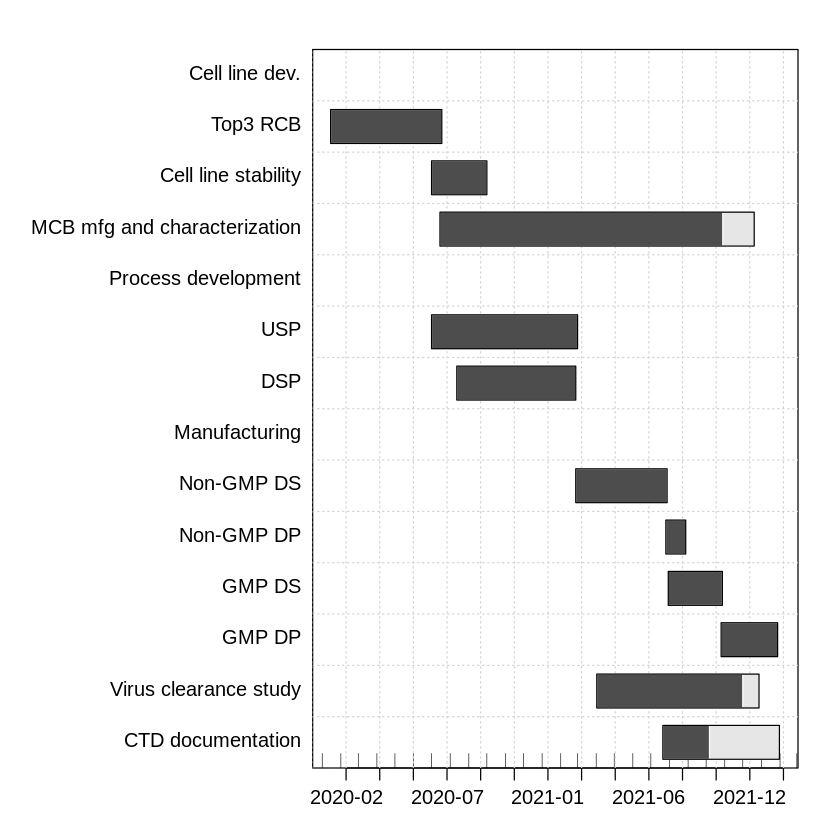

In [12]:
legend("topright", pch=22, pt.cex=2, cex=0.9, pt.bg=gray(c(0.3, 0.9)),
       border="black",
       legend=c("Completed", "Not Yet Done"), bg="white", xpd=TRUE)
 

plot(g, time.format="%Y-%m",
     event.label='Report Date',event.time='2021-10-27',
     col.event=c("red"),
     col.done=c("lightblue"),
     col.notdone=c("pink"),
     main="Gantt plot by R")

legend("topright", pch=22, pt.cex=2, cex=0.9, pt.bg=c("lightblue", "pink"),
       border="black",
       legend=c("Completed", "Not Yet Done"), bg="white", xpd=TRUE)
 
plot(g, xlim, time.format = "%Y-%m", time.labels.by="8 weeks",
    time.lines.by="8 weeks", event.time = NULL, event.label = NULL, event.side = 3,
    col.connector = "black", col.done = gray(0.3), col.notdone = gray(0.9),
    col.eventLine = gray(0.1), col.event = par("fg"),
    cex.event = par("cex"), font.event = par("font"),
    lty.eventLine = par("lty"), lwd.eventLine = par("lwd"), bg = par("bg"),
    grid.col = "lightgray", grid.lty = "dotted", ylabels = list(col=1, cex=1, font = 1, justification = 1),
    arrows = NULL, main = "",
    line.main = NA, cex.main = par("cex"), mgp = c(2, 0.7, 0), maiAdd = rep(0, 4), axes = TRUE, debug = FALSE)
 

# 4. 마치며,

어떻게 생각하면 엑셀로 간단하게 할 수 있는 것을 번거롭게 하는 것일 수도 있겠습니다. 그래도 항상 같은 방법을 사용하는 것보다는 재미있으니까 예제 코드를 정리해 보았습니다.